# Guided Project: Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we'll try to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will combine the results for both surveys to answer these questions. You can find description of the columns of the datasets in the README file.

Let's start by reading in the datasets and exploring them.

In [827]:
import pandas as pd
import numpy as np

In [828]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [829]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [830]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [831]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [832]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Cleaning the data

From the above few cells we see:

- The `dete_survey` dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues.

In [833]:
#First, let's re-open the dete_survey dataset
#but this time replace the 'Not stated' values with NaN

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [834]:
#Let's drop the columns which we will not use from the DETE survey:

columns_to_drop = dete_survey.iloc[:,28:49]
dete_survey_updated = dete_survey.drop(columns_to_drop, axis=1)

In [835]:
#Let's drop the columns which we will not use from the TAFE survey:

drop_columns = tafe_survey.iloc[:, 17:66]
tafe_survey_updated = tafe_survey.drop(drop_columns, axis=1)

Above, we preformed some data cleaning steps:

- 'Not stated' in the dete survey was replaced with NaN.
- Columns which will not be used were dropped. The updated versions of the datasets were assigned to two new dataframes - `dete_survey_updated` and `tafe_survey_updated`.


## Renaming the columns

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different.

In [836]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ', '_')

In [837]:
dete_survey_updated.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [838]:
tafe_survey_updated = tafe_survey_updated.rename(columns={
    'Record ID':'id', 
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
})

In [839]:
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In the above few cells, the names of the columns in both dataframes were updated.

## Filter the data

Next, let's remove more of the data we don't need. Our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

This means that we are only interesed in employees who have resigned.

In [840]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [841]:
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [842]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [843]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [844]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [845]:
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [846]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()

In [847]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Above, two new dataframes were created - dete_resignations and tafe_resignations. They hold data only for those employees who resigned.

## Verify the data

Next, we'll focus on verifying that the years in the `cease_date` and `dete_start_date columns` make sense.

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [848]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [849]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)

In [850]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [851]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [852]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Above, we cleaned the columns of both dataframes which contain the start and cease date of the resigned employees. There do not appear to be any major issues with the values. The span of the cease years for both dataframes is a bit different:

- DETE: 2006 - 2014
- TAFE: 2009 - 2013

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The TAFE dataset contains a column called `institute_service`. Unfortunately, the DETE dataset does not have such a column. We do, however, have the needed data to create this column. It should contain the difference between the `cease_date` and the `dete_start_date columns`.

In [853]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Identify dissatisfied employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

 1. TAFE:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
 2. DETE:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [854]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [855]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [856]:
def updated_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True

In [857]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(updated_vals)

In [858]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [859]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [860]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis='columns', skipna=False)

In [861]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [862]:
dete_diss_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
'work_life_balance', 'workload']

dete_resignations['dissatisfied'] = dete_resignations[dete_diss_columns].any(axis='columns', skipna=False)

In [863]:
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [864]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Above, we created a `dissatisfied` column in both dataframes. The values of the columns are either True or False based on the emplyees' response to the questions in the columns we identified above.

Additionally, we created copies of each dataframe.

## Combining the data

In [865]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [866]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [867]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In the above few cells we did the following:

- created an `institute` column in each dataset indicating where the employee worked;
- combined the two datasets into a new one called combined;
- removed any columns from the new dataset which had over 500 NaN values. The resulting dataset was assigned to combined_updated.

## Clean the 'institute_service' column

Next we need to clean the `institute_service` column as it contains values in a couple of different formats. To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [868]:
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [869]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [870]:
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [871]:
def career_stages(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3:
        return 'New'
    elif 3 <= x <= 6:
        return 'Experienced'
    elif 6 < x <= 10:
        return 'Established'
    elif x > 10:
        return 'Veteran'

In [872]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stages)

In [889]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Above, we cleaned the `institute_service` column. We used the value from that column in order to determine in which category the employee falls. We created a new column - `service_cat` - where we see the category of the employee.

## Dissatisfied by category

In [874]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [875]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [876]:
table = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied')

In [877]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-colorblind')

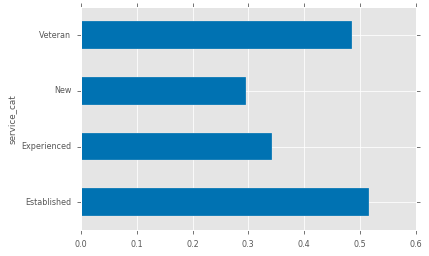

In [878]:
table.plot(kind='barh', legend=False)

Above, we created a pivot table which calcualtes the percentage of dissatisfied employees for each service category. Afterwards, we plotted the results on a horizontal bar chart. 

We can see that of the employees who took the two serveys, Established and Veteran employees are more likely to resign due to dissatisfaction. New employees are least likely to do so.

## How many people in each career stage resigned due to some kind of dissatisfaction?

In [879]:
diss_count = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied', aggfunc='sum')
diss_count = diss_count.sort_values(by=['dissatisfied'])
diss_count = diss_count.rename(columns={'dissatisfied':'dissatisfied_count'})
diss_count

,dissatisfied_count
service_cat,
Established,32.0
New,57.0
Experienced,59.0
Veteran,66.0


Above we see the number of people in each service category who left due to dissatisfaction.

## Dissatisfied by age

Below we will clean the 'age' column by grouping the employees in age groups. Afterwards, we will answer the question:

- How many people in each age group resgined due to some kind of dissatisfaction?

In [880]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [881]:
combined_updated['age'] = combined_updated['age'].astype('str')
combined_updated['age'] = combined_updated['age'].str.replace('  ', '-').str.replace('56-60', '56 or older').str.replace('61 or older', '56 or older').str.replace('nan', '41-45')

In [882]:
combined_updated['age'].value_counts()

41-45            148
46-50             81
56 or older       78
36-40             73
51-55             71
26-30             67
21-25             62
31-35             61
20 or younger     10
Name: age, dtype: int64

In [902]:
age_diss_count = pd.pivot_table(combined_updated, index='age', values='dissatisfied', aggfunc='sum')
age_diss_count = age_diss_count.sort_values(by=['dissatisfied'])
age_diss_count = age_diss_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
age_diss_count

,dissatisfied_count
age,
20 or younger,2.0
21-25,19.0
31-35,23.0
36-40,25.0
26-30,28.0
51-55,30.0
46-50,31.0
56 or older,33.0
41-45,49.0


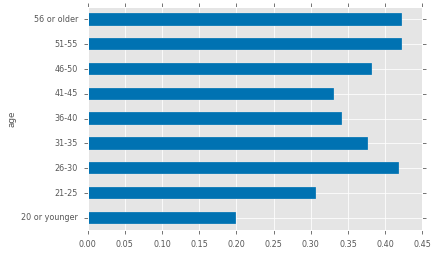

In [898]:
age_perc = pd.pivot_table(combined_updated, index='age', values='dissatisfied')
age_perc.plot(kind='barh', legend=False)

In the charts above we see:

1. The number of people in each age group who resigned due to dissatisfaction.
2. The percent of people in each age group who resigned due to dissatisfaction.

Overall, young employees of the two institues who resigned due to job dissatisfaction is lowest. This might be due to the fact that they were early in their career development and were still looking for a career path to follow.

# Dissatisfied by institute

- Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [885]:
institute_count = pd.pivot_table(combined_updated, index='institute', values='dissatisfied', aggfunc='sum')
institute_count = institute_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
institute_count

,dissatisfied_count
institute,
DETE,149.0
TAFE,91.0


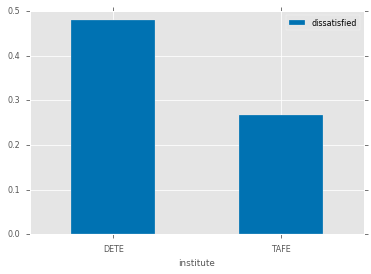

In [886]:
by_perc = pd.pivot_table(combined_updated, index='institute', values='dissatisfied')
by_perc.plot(kind='bar', rot=360)

In the charts above we see:

1. The number of people from each institute who resigned due to dissatisfaction.
2. The percent of people from each institute who resigned due to dissatisfaction.

It seems that DETE employees have resigned due to job dissatisfaction more often than TAFE employees.

## Dissatisfaction by gender

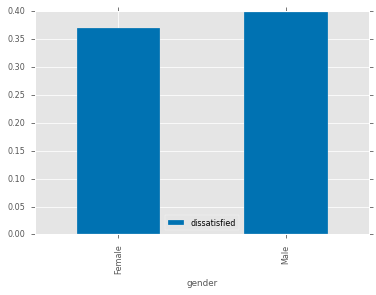

In [911]:
by_gender = pd.pivot_table(combined_updated, index='gender', values='dissatisfied')
by_gender.plot(kind='bar')

# Conclusion

In this project, we analyzed the exit surveys of employees of the DETE and TAFE institutes. We focused on those who resiged due to some sort of job dissatisfaction and concluded that:

- young, inexperienced employees resigned least often due to job dissatisfaction;
- DETE employees resigned more often due to job dissatisfaction than TAFE employees;
- Male employees resigned more often due to job dissatisfaction than Female employees;